# 워드클라우드 (한글)
## 01. 형태소 분석의 이해
#### 형태소
- 의미가 있는 최소의 단위(minimally meaningful unit)
- 문법적, 관계적인 뜻을 나타내는 단어 또는 단어의 부분
- 일정한 범위 안에서 쓰이는 낱말의 총체

문법적으로 더 이상 나눌 수 없는 언어 요소를 형태소라고 한다.

영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야 한다.

#### 형태소 분석 예시
##### 형태소 사전에 수록된 기준으로 분석


In [5]:
from konlpy.tag import Okt

In [6]:
nlp = Okt()

In [7]:
sample = "1994년 도입한 'KBS·EBS 방송 수신료 통합징수 방식'이 30년 만에 전격폐지됐다. 월 2500원의 수신료를 전기요금에서 분리해 징수하도록 하는 방송법 시행령 개정령안이 11일 오전 국무회의 의결을 거침에 따라 12일부터 수신료를 전기요금과 별도로 납부하는 일이 가능해졌다."

In [8]:
nouns = nlp.nouns(sample)
print(nouns)

['도입', '방송', '수신료', '통합', '징수', '방식', '이', '전격', '폐지', '월', '수신료', '전기요금', '분리', '징수', '방송', '법', '시행', '령', '개', '정령', '안이', '오전', '국무회의', '의결', '수신료', '전기요금', '별도', '납부']


In [9]:
import konlpy
konlpy.data.path

['C:\\Users\\yis82/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\\konlpy_data',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\\lib\\konlpy_data',
 'C:\\Users\\yis82\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\yis82\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\konlpy/data']

In [10]:
from wordcloud import WordCloud
from collections import Counter # 리스트 안에 단어 갯수를 구할 때 사용 가능
from IPython.display import Image , display

#### 분석할 데이터 가져오기

In [11]:
with open("wordcloud/대한민국헌법.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    #print(text)

#### 데이터에 대한 형태소 분석

In [12]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(text)
#print(nouns)

#### (추가) 불용어 목록 가져오기

In [13]:
with open("wordcloud/stopwords-ko.txt", 'r', encoding='utf-8') as f:
    stopwords = f.readlines()

    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()

    # print(stopwords)

#### (추가) 추출된 명사에서 불용어를 제거함

In [14]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

#print(data_set)

In [17]:
count = Counter(data_set)
# count 

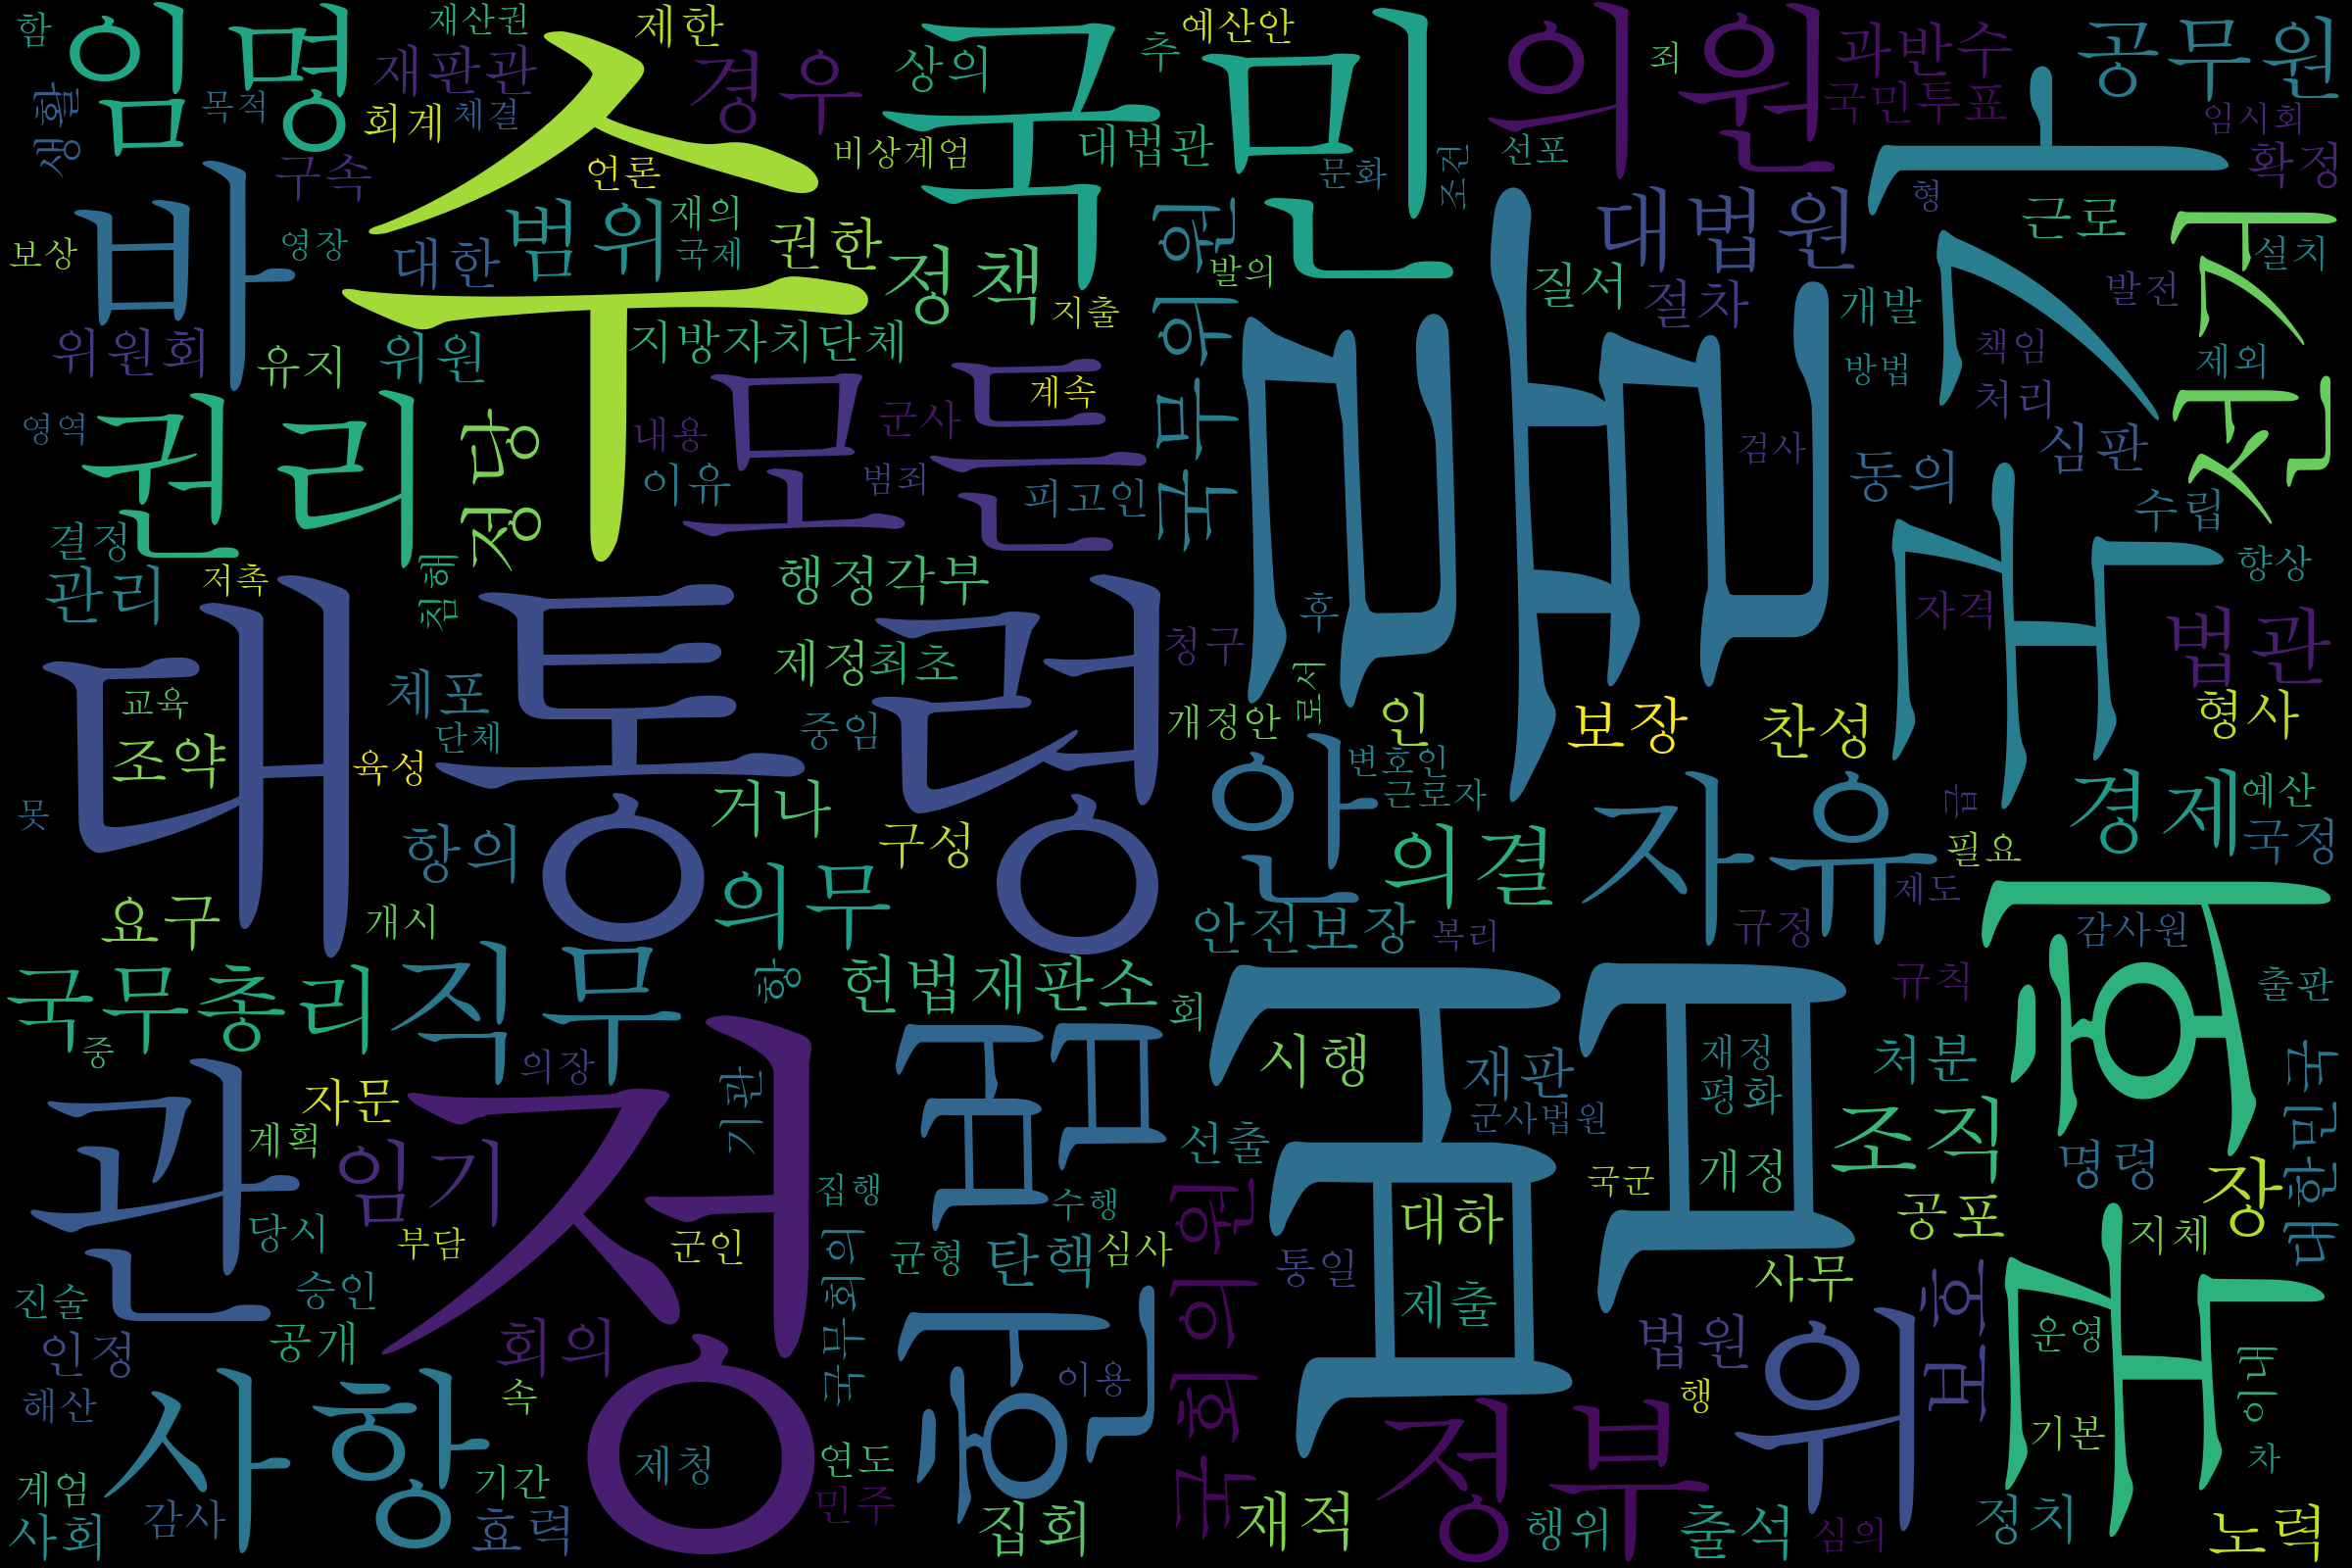

In [18]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path="./wordcloud/batang.ttc", width=1200, height=800, scale=2.0)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
display(Image(filename='대한민국헌법-주요단어.png'))